# Logistic regression and gradient descent basics

In [1]:
import sympy

### Define variables and functions

In [2]:
x0,x1,x2 = sympy.var('x0,x1,x2')

f = sympy.Matrix([x0**2+x1*x2, x0+x1+x2])
g = sympy.Matrix([sympy.sin(x0), x1**3+x0*x1, x2])

### Map function g on parameters of function f

In [3]:
substitution_fg = {'x0':g[0], 'x1':g[1], 'x2':g[2]}

### Function compozition fog = f(g(x))

In [4]:
fog = f.subs(substitution_fg)

### Direct Jacobian matrix

In [5]:
Jfog = fog.jacobian([x0,x1,x2])
Jfog.simplify()
sympy.pprint(Jfog)

⎡                      ⎛         2⎞     ⎛       2⎞⎤
⎢x₁⋅x₂ + sin(2⋅x₀)  x₂⋅⎝x₀ + 3⋅x₁ ⎠  x₁⋅⎝x₀ + x₁ ⎠⎥
⎢                                                 ⎥
⎢                              2                  ⎥
⎣  x₁ + cos(x₀)       x₀ + 3⋅x₁            1      ⎦


### Jacobian of each function

In [6]:
Jf = f.jacobian([x0,x1,x2])
Jg = g.jacobian([x0,x1,x2])

### Rule of chaining

In [7]:
Jfog2 = Jf.subs(substitution_fg)*Jg
Jfog2.simplify()
sympy.pprint(Jfog2)

⎡                      ⎛         2⎞     ⎛       2⎞⎤
⎢x₁⋅x₂ + sin(2⋅x₀)  x₂⋅⎝x₀ + 3⋅x₁ ⎠  x₁⋅⎝x₀ + x₁ ⎠⎥
⎢                                                 ⎥
⎢                              2                  ⎥
⎣  x₁ + cos(x₀)       x₀ + 3⋅x₁            1      ⎦


### Hessian matrix

In [8]:
f0 = sympy.Matrix([f[0]])
Jf0 = f0.jacobian([x0,x1,x2])

H = Jf0.jacobian([x0,x1,x2])
sympy.pprint(H)

⎡2  0  0⎤
⎢       ⎥
⎢0  0  1⎥
⎢       ⎥
⎣0  1  0⎦


## Class Random2DGaussian

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, average_precision_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [59]:
class Random2DGaussian():
    np.random.seed(100)
    
    def __init__(self):
        self.min_x = 0
        self.max_x = 10
        self.min_y = 0
        self.max_y = 10
        
        centar_x = np.random.random_sample()
        centar_y = np.random.random_sample()
        self.mean = np.array([centar_x, centar_y])
        
        eigval_x = (np.random.random_sample()*(self.max_x - self.min_x)/5)**2
        eigval_y = (np.random.random_sample()*(self.max_y - self.min_y)/5)**2
        
        D = np.array([[eigval_x, 0], [0, eigval_y]])
        R = np.array([[45, 0], [0, 45]])
        
        self.covariance_matrix = R.T * D * R
    
    def get_sample(self, n, show=False):
        assert(n > 0)

        if show:
            print 'Mean:\n', self.mean
            print '\nCovariance matrix:\n', self.covariance_matrix
        
        x, y = np.random.multivariate_normal(self.mean, self.covariance_matrix, size=n).T
        return np.column_stack((x, y))

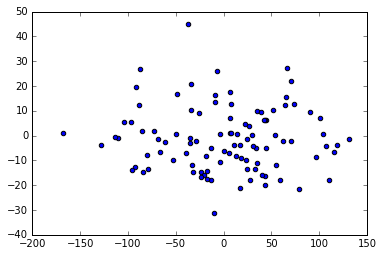

In [62]:
G = Random2DGaussian()
X = G.get_sample(100)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [162]:
'''
Argumenti
  X:  podatci, np.array Nx2
  Y_: indeksi razreda, np.array Nx1

Povratne vrijednosti
  w, b: parametri logističke regresije
'''
def binlogreg_train(X,Y_):
    b = 0
    w = np.random.randn(2)
    
    # HYPERPARAMETERS
    param_niter = 1000
    param_delta = 0.1
    
    # gradijentni spust (param_niter iteracija)
    for i in range(param_niter):
        # klasifikacijski rezultati
        scores = np.dot(X, w) + b
        #print 'Scores', scores

        # vjerojatnosti razreda c_1
        probs = float(1) / (1 + np.exp(-scores))
        #probs = np.exp(scores) / (1 + np.exp(scores))
        #print 'probs', probs

        # gubitak
        loss  = np.sum(-np.log(probs))
#         step1 = Y_ * np.log(probs)
#         step2 = (1-Y_) * np.log(1 - probs)
#         final = -step1 - step2
#         loss = np.mean(final)
        #print 'loss', loss

        # dijagnosticki ispis
        if i % 10 == 0:
            print("iteration {}: loss {}".format(i, loss))

        # derivacije gubitka po klasifikacijskom rezultatu
        dL_dscores = scores - probs
        #print 'dL_dscores', dL_dscores

        # gradijenti parametara
        grad_w = np.dot(dL_dscores, X)
        grad_b = np.sum(dL_dscores)
        #print 'grad_w', grad_w
        #print 'grad_b', grad_b

        # poboljšani parametri
        w += -param_delta * grad_w
        b += -param_delta * grad_b

    return w, b

In [163]:
'''
  Argumenti
      X:    podatci, np.array Nx2
      w, b: parametri logističke regresije

  Povratne vrijednosti
      probs: vjerojatnosti razreda c1
'''
def binlogreg_classify(X, w, b):
    pred_prob = np.dot(w, X.T) + b
    probs = np.where(pred_prob >= .5, 1, 0)
    return probs

In [164]:
def sample_gauss_2d(C, N):
    G = Random2DGaussian()
    Y_ = np.random.choice([0, 1], size=(N,), p=[1./2, 1./2])
    return G.get_sample(N), Y_

In [165]:
def eval_perf_binary(Y, Y_):
    return accuracy_score(Y, Y_), recall_score(Y, Y_), precision_score(Y, Y_)

In [166]:
def eval_AP(Y_sorted):
    return 0.5
    
print eval_AP([0,0,0,1,1,1])
#1.0
print eval_AP([0,0,1,0,1,1])
#0.9166666666666666
print eval_AP([0,1,0,1,0,1])
#0.7555555555555555
print eval_AP([1,0,1,0,1,0])
#0.5

0.5
0.5
0.5
0.5


In [167]:
np.random.seed(100)

# get the training dataset
X,Y_ = sample_gauss_2d(2, 100)

# train the model
w,b = binlogreg_train(X, Y_)

# evaluate the model on the training dataset
probs = binlogreg_classify(X, w,b)
Y = np.where(probs >= .5, 1, 0)

# report performance
accuracy, recall, precision = eval_perf_binary(Y, Y_)
AP = eval_AP(Y_[probs.argsort()])
print (accuracy, recall, precision, AP)

iteration 0: loss 3249.63266934
iteration 10: loss inf
iteration 20: loss inf
iteration 30: loss inf
iteration 40: loss inf
iteration 50: loss inf
iteration 60: loss inf
iteration 70: loss nan
iteration 80: loss nan
iteration 90: loss nan
iteration 100: loss nan
iteration 110: loss nan
iteration 120: loss nan
iteration 130: loss nan
iteration 140: loss nan
iteration 150: loss nan
iteration 160: loss nan
iteration 170: loss nan
iteration 180: loss nan
iteration 190: loss nan
iteration 200: loss nan
iteration 210: loss nan
iteration 220: loss nan
iteration 230: loss nan
iteration 240: loss nan
iteration 250: loss nan
iteration 260: loss nan
iteration 270: loss nan
iteration 280: loss nan
iteration 290: loss nan
iteration 300: loss nan
iteration 310: loss nan
iteration 320: loss nan
iteration 330: loss nan
iteration 340: loss nan
iteration 350: loss nan
iteration 360: loss nan
iteration 370: loss nan
iteration 380: loss nan
iteration 390: loss nan
iteration 400: loss nan
iteration 410: lo

/home/weenkus/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: overflow encountered in exp
/home/weenkus/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in log
/home/weenkus/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in greater_equal


In [168]:
import Tensorflow

ImportError: No module named Tensorflow